In [10]:
from amuse.lab import *
from amuse.units import (units, constants)
import matplotlib.pyplot as plt
from amuse.community.mesa.interface import MESA
import numpy as np
from amuse.ext.star_to_sph import convert_stellar_model_to_SPH

Particle(5475441164519532282, set=<140526165266544>
    , age=0.0 yr
    , central_density=77.6310046654 g / (cm**3)
    , central_temperature=13714230.8512 K
    , core_mass=0.0 MSun
    , luminosity=0.73015336531 LSun
    , mass=1.0 MSun
    , mass_change=0.0 MSun / yr
    , radius=0.893773591284 RSun
    , stellar_type=Main Sequence star
    , temperature=5647.67353961 K
    , time_step=100000.0 yr
    , wind=-0.0 g / s)
0.0 Myr
0.1 Myr
0.22 Myr
0.364 Myr
0.5368 Myr
0.74416 Myr
0.992992 Myr
1.2915904 Myr
1.64990848 Myr
2.079890176 Myr
2.5958682112 Myr
3.21504185344 Myr
3.95805022413 Myr
4.84966026895 Myr
5.91959232274 Myr
7.20351078729 Myr
8.74421294475 Myr
10.5930555337 Myr
12.8116666404 Myr
15.4739999685 Myr
18.6687999622 Myr
22.5025599547 Myr
27.1030719456 Myr
32.6236863347 Myr
39.2484236017 Myr
47.198108322 Myr
56.7377299864 Myr
68.1852759837 Myr
81.9223311805 Myr
98.4067974166 Myr
118.1881569 Myr
141.92578828 Myr
170.410945936 Myr
204.593135123 Myr
245.611762148 Myr
294.8341145

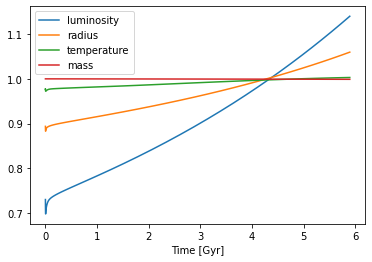

In [12]:
# Constants of the Sun (maybe use the AMUSE constants)
z = 0.0134
TSun = 5778
LSun = 3.826e33
RSun = 696340e5
current_age_sun = 4.603e3 | units.Myr

# evolving_age = 12e3 | units.Myr

# This is a testing age because 12 Gyr takes a long time
evolving_age = 6e3 | units.Myr

stellar = MESA()

sun = Particles(1)
sun.mass = 1 | units.MSun

# We can just ignore these parameters, MESA will calculate them
# sun.radius = RSun | units.cm 
# sun.density = 1.41 | units.g / units.cm**3
# sun.temperature = TSun | units.K
# sun.luminosity = LSun | units.erg / units.s

stellar.particles.add_particles(sun)
stellar.parameters.metallicity = z

print(stellar.particles[0])

time_evolution = []
luminosity_evolution = []
radius_evolution = []
temperature_evolution = []
mass_evolution = []

while stellar.particles[0].age <= evolving_age:
    time_evolution.append(stellar.particles[0].age.value_in(units.Myr))
    luminosity_evolution.append(stellar.particles[0].luminosity.value_in(units.LSun) * LSun)
    radius_evolution.append(stellar.particles[0].radius.value_in(units.RSun) * RSun)
    temperature_evolution.append(stellar.particles[0].temperature.value_in(units.K))
    mass_evolution.append(stellar.particles[0].mass.value_in(units.MSun))
    
    print(stellar.particles[0].age.in_(units.Myr))
    
    stellar.evolve_model()
    
print(stellar.particles[0])

sun_in_sph = convert_stellar_model_to_SPH(stellar.particles[0], 340000).gas_particles
write_set_to_file(stellar.particles, 'sun_redgiant.amuse', "amuse")
stellar.stop()

time_evolution = np.array(time_evolution)
luminosity_evolution = np.array(luminosity_evolution)
radius_evolution = np.array(radius_evolution)
temperature_evolution = np.array(temperature_evolution)
mass_evolution = np.array(mass_evolution)

plt.plot(time_evolution / 1000, luminosity_evolution / LSun, label="luminosity")
plt.plot(time_evolution / 1000, radius_evolution / RSun, label="radius")
plt.plot(time_evolution / 1000, temperature_evolution / TSun, label="temperature")
plt.plot(time_evolution / 1000, mass_evolution / units.MSun.value_in(units.MSun), label="mass")
plt.xlabel("Time [Gyr]")
plt.legend(loc="upper left")
plt.show()

In [13]:
print(sun_in_sph)

                 key          c12           h1     h_smooth          he3          he4         mass         mg24           mu          n14         ne20          o16            u           vx           vy           vz            x            y            z
                   -         none         none         RSun         none         none           kg         none          amu         none         none         none  m**2 * s**-2        m / s        m / s        m / s           cm           cm           cm
====================  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========  ===========
11936980531233850728    3.180e-05    1.906e-01    5.632e-02    1.454e-06    7.891e-01    5.843e+24    4.087e-03    1.020e+00    6.949e-03    2.100e-03    7.121e-03    2.074e+11    0.000e+00    0.000e+00    0.000e+00    1.171e+08   -8.

In [ ]:
#solar mass/ earth mass = 333000

Nsph = Nsph * int(mass.value_in(units.MSun))
star_in_sph = convert_stellar_model_to_SPH(star, Nsph).gas_particles